# Introduction to Ensemble Methods

## Overview

* Intuition behind ensemble methods
* Components of the ensemble approach
* Different types of ensemble
    

In this learning unit we'll introduce ensemble methods, a machine learning meta-algorithm for improving model performance

## Ensemble model: introduction

A model's output changes based on:
1. hyperparameters: set by you
2. parameters: learned from input data

Training a model with different inputs $\longrightarrow$ different outputs

Can exploit this with **ensemble models** to achieve better performance

The general aim in machine learning is to create a model that, when given some data, outputs some new data.

For a classification model, the output will be a label - True/False, Yes/No, Red/Green/Blue, etc.

For a regression model, the output will be a value - 0.2, 1.32343, etc.

For any fixed input, the output will change based on two main things.

First, the hyperparameters of the model. For example, in a Support Vector Machine (SVM) this will be regularisation parameter $C$. 

Second, the parameters learned by the model from the data. This part is the key idea behind ensemble models.

Rather than have one model that performs very well (which is hard to achieve!) we use multiple weaker models together.

Let's look into this in more detail.

## Wisdom of crowds

Imagine a competition, where you have to guess the weight of a cow, and the closest guess gets to keep it. 

You are not a cow-weighing expert, and so your guess is unlikely to be correct. However, you should still be able to have a good guess!

Whilst your answer is not correct, you are able to see the guesses of everyone before you. What should you do?

## The wisdom of crowds

An alternative approach is to ask several people and take the average.

The hope is that, since you don't have access to a single expert on cow weights, the various experiences and knowledge levels of a group of people will converge on the true answer. Some people might work in a farm, or some might just be good at guessing the weights of objects!

As long as each person is not guessing at random and is instead drawing on some kind of information, the majority vote should give a better idea of the correct answer. The more diverse the group of people you are asking, the better results you would get. 

**This is essentially what ensemble methods do.**

## Components of the ensemble approach

1. A base model (decision trees usually, but svm / lr / knn can work too)
2. A meta-algorithm, to estimate diverse instances of the base models on the training data
3. A way to combine the guesses of the base models to make a final decision

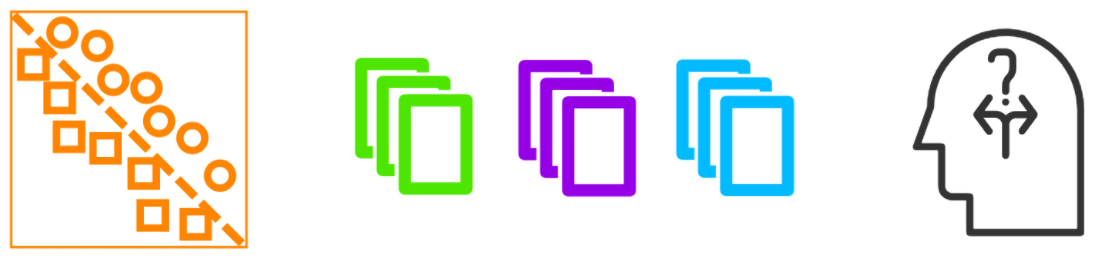


In machine learning, we replace each person in the crowd with a predictive model. 

We want each model to make its prediction in different ways, i.e. to be diverse. 

One way to do this is to train them on different subsets of the data - this is like the people in the crowd all having different experiences and knowledge about the weights of cows.

Once we have all the answers from each model, we then turn them into a single output. For classification, this might be the most commonly predicted class. For regression, it could be the average of the predicted values.

## An example meta-algorithm: Bagging

* Train on different slices of the data
* Get prediction for $\star$ from each model
* Average the predictions

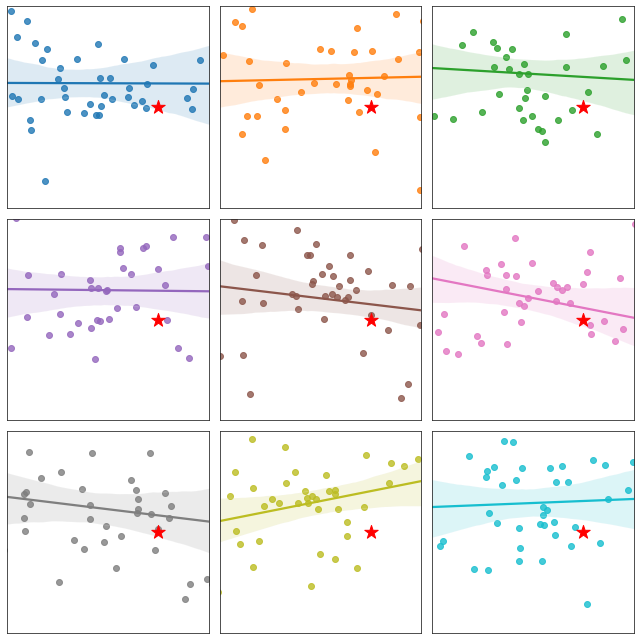


## Why does this work?

* Ideal situation: learn from seen data **and** generalise to unseen
*  We would like to have a model with low bias (i.e. able to learn data patterns efficiently) and low variance (i.e. able to generalise on unseen data and less likely to overfit).
* Achieving both in the same model is difficult

## Why does this work?


* Bias vs Variance
* High bias $\rightarrow$ miss patterns in data
* High variance $\rightarrow$ focus on noise in data
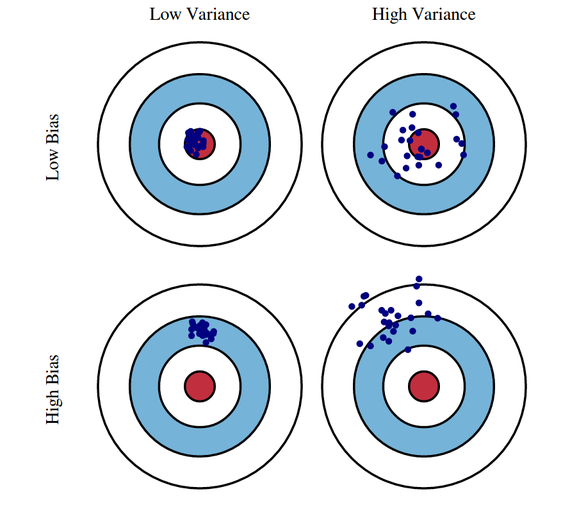



How can many weak models trained on parts of the data outperform one model trained on all of it?

Because having a model that learns all the patterns from the data it sees AND can generalise to unseen data, likely with new but related patterns, is very difficult.

In a bagging approach, each model learns about a different part of the data.

The hope is that the individual models will be good at learning the patterns from that subset, while other models learn the patterns from other subsets.

When you bring them all together, you get the benefit of not being tied to one output - especially useful when dealing with rare outputs.

## Types of ensemble methods

* Bagging
    * Train weak learners *in parallel* on *subsets* of data
    * Each model gets one vote
        * All votes can be equal
        * Or weighted according to model confidence

There are three main types of ensemble meta-algorithms.

Bagging is conceptually the simplest and the one that has been illustrated above.

The weak learners become collectively strong as an ensemble.

## Types of ensemble methods

* Boosting
    * Train weak learners *sequentially* on *all* of the data
    * Use errors from previous models to estimate next weak learner
        * EITHER: set weights on training samples (Increase weights of incorrect instances, decrease the one from correct instances) - e.g. AdaBoost
        * OR: sequentially predict residuals of previous model predictions - e.g. XGBoost
    * Combine predictions of each classifier
        * Each model gets one 'vote'
        * Better-performing models get stronger votes

Boosting is slightly more complex. Rather than training many weak models on subsets of the dataset just once, they are trained iteratively.

At each re-training step, the training items the model got wrong are given increased importance to ensure the model learns them.

We need to select an appropriate base model for the meta-algorithm. 

## Suitable base models for bagging/boosting

* Bagging and boosting both estimate multiple weak learners on data 
* Need a base model that is:
    * Simple to estimate
    * Simple to obtain predictions from
    * Has high variance (to ensure diverse weak learners)
* E.g. decision trees!

We need to select an appropriate base model for the meta-algorithm. 

## Combining different base models

* Stacking:
    * Combine different base models all trained on the same task
        * Can be a mixture of models, e.g. Neural Networks, SVM and Random Forest
        * Or the same model but with different hyper-parameters
    * Train a meta model to combine predictions
        * Optimises how to combine individual predictions with a (simpler) second model
    * Two levels of cross-validation
        * Makes sure the two levels are properly validated, avoiding overfitting. Crucial for these models of large complexity.
    * Combine the strengths of different model families.
        * Gives pragmatic boost in prediction, being employed in most high-performance applications and Kaggle competitions.

Stacking is very important as a second-order model. It combines any models you fit for your tasks, to boost to a combined prediction. Models are like Frankenstein's monster, as you can add any type together. 

Use a second model to combine the predictions in an optimal way. Has a delicate multi-level cross-validation method to avoid overfitting when combining many models.

It's present in winners of Kaggle competitions and other cases where any gain in performance is key.

## Ensemble models: Pros and cons



${\color{blue}+}$ Improved performance

${\color{red}-}$ Reduced interpretability

${\color{red}-}$ Additional training overhead

In conclusion, ensemble methods can be a good way to improve performance. However, this comes at the cost of interpretability - it becomes difficult to state the exact process that lead to the decision. Furthermore, there are obviously additional overheads involved in training many models. Bagging ensembles are easy to parallelise because all the models are independent, but boosting ensembles rely on the output of prior steps.